In [46]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 定数設定
GRID_SIZE = 20  # グリッドのサイズ
AGENT_RATIO = 0.5  # エージェントの比率
THRESHOLD = 0.6  # 許容閾値

# エージェントのタイプ
EMPTY = 0
TYPE_A = 1
TYPE_B = 2

# ランダムシードの設定
# random.seed(0)

# グリッドの初期化
def initialize_grid(grid_size, agent_ratio):
    num_agents = int(grid_size * grid_size * agent_ratio)
    grid = np.full((grid_size, grid_size), EMPTY)
    
    # エージェントを配置
    positions = random.sample(range(grid_size * grid_size), num_agents)
    for pos in positions:
        x, y = divmod(pos, grid_size)
        if random.random() < 0.5:
            grid[x, y] = TYPE_A
        else:
            grid[x, y] = TYPE_B
    
    return grid

In [47]:
def count_neighbors(grid, x, y, agent_type):
    count = 0
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if (dx != 0 or dy != 0):
                nx, ny = x + dx, y + dy
                if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE and grid[nx, ny] == agent_type:
                    count += 1
    return count

def calculate_different_ratio(grid, x, y):
    agent_type = grid[x, y]
    same_neighbors = count_neighbors(grid, x, y, agent_type)
    total_neighbors = count_neighbors(
        grid, x, y, TYPE_A) + count_neighbors(grid, x, y, TYPE_B)
    same_ratio = same_neighbors / total_neighbors if total_neighbors > 0 else 0
    return 1 - same_ratio
    

In [48]:
def move(grid, x, y):
    empty_positions = [(i, j) for i in range(GRID_SIZE)
                        for j in range(GRID_SIZE) if grid[i, j] == EMPTY]
    if empty_positions:
        new_x, new_y = random.choice(empty_positions)
        grid[new_x, new_y] = agent_type
        grid[x, y] = EMPTY
        
    return grid

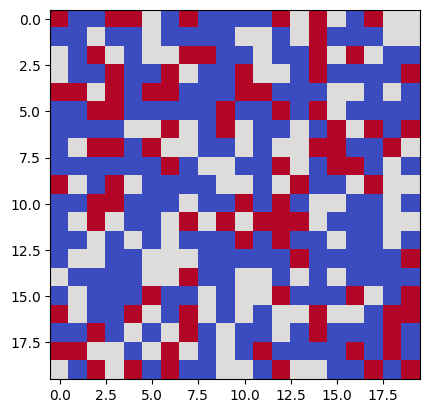

In [49]:
grid = initialize_grid(GRID_SIZE, AGENT_RATIO)
plt.imshow(grid, cmap='coolwarm', vmin=0, vmax=2)


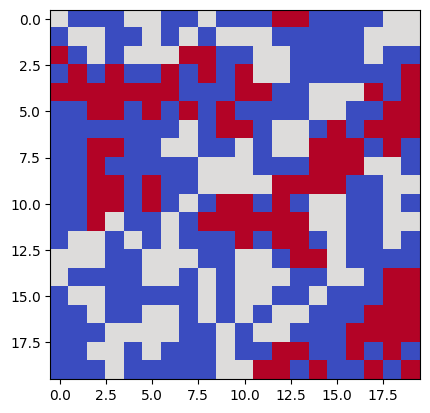

In [50]:
steps = 0
while True:
    new_grid = grid.copy()
    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            agent_type = grid[x, y]
            if agent_type != EMPTY:
                diff_ratio = calculate_different_ratio(grid, x, y)
                if diff_ratio > THRESHOLD:
                    new_grid = move(new_grid, x, y)
    steps += 1
    if np.all(grid == new_grid):
        break
    grid = new_grid

plt.imshow(grid, cmap='coolwarm', vmin=0, vmax=2)
